In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error

In [34]:
data = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")

In [35]:
cols = []
for column in range(len(data.columns)):
    cols.append(data.columns[column].lower())
data.columns = cols

In [36]:
def nan_values(data):
    nulls_data = data.isna().sum()/len(data)*100
    print(nulls_data)

In [37]:
def r_nan_cols(data):
    data_copy = data.copy()
    nulls_data = data.isna().sum()/len(data)*100
    for item in nulls_data.index:
        data_copy.drop([item], inplace=True, axis=1)
    print(item)

In [38]:
numerical = data._get_numeric_data()
numerical.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

In [39]:
categorical = data.select_dtypes(include='object')
categorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

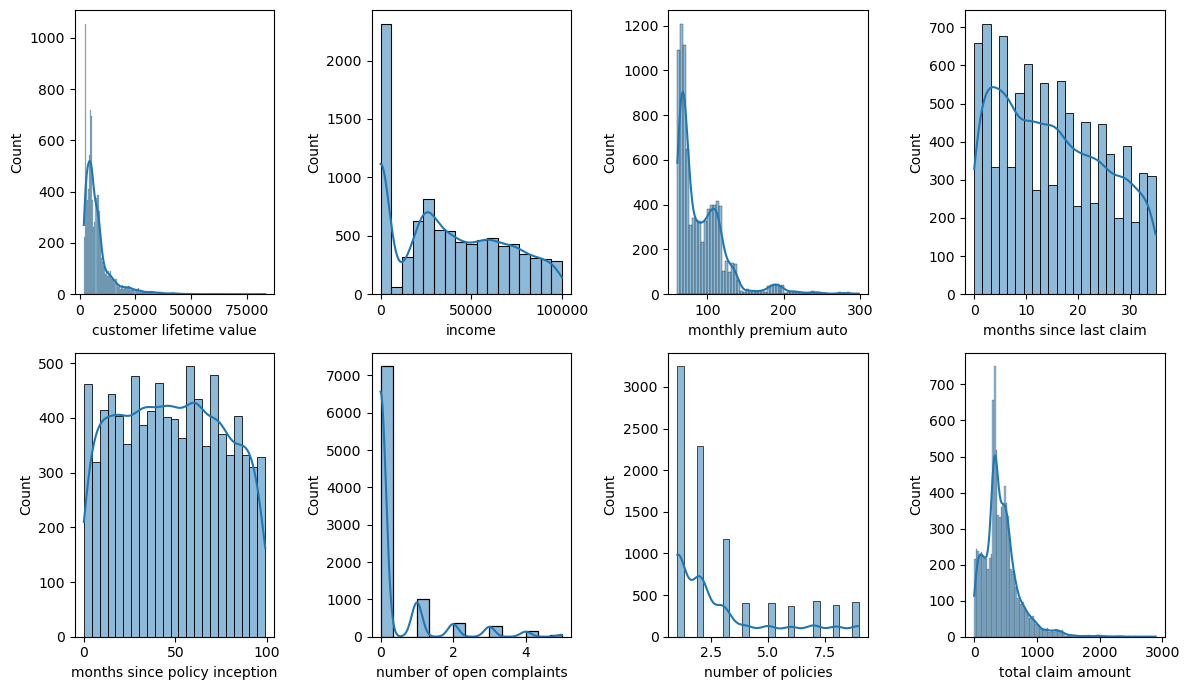

In [42]:
fig, axis = plt.subplots(2,4, figsize=(12,7))

sns.histplot(data['customer lifetime value'].values, kde=True, ax = axis[0,0]).set_xlabel('customer lifetime value')

sns.histplot(data['income'].values, kde=True, ax = axis[0,1]).set_xlabel('income')

sns.histplot(data['monthly premium auto'].values, kde=True, ax = axis[0,2]).set_xlabel('monthly premium auto')

sns.histplot(data['months since last claim'].values, kde=True, ax = axis[0,3]).set_xlabel('months since last claim')

sns.histplot(data['months since policy inception'].values, kde=True, ax = axis[1,0]).set_xlabel('months since policy inception')

sns.histplot(data['number of open complaints'].values, kde=True, ax = axis[1,1]).set_xlabel('number of open complaints')

sns.histplot(data['number of policies'].values, kde=True, ax = axis[1,2]).set_xlabel('number of policies')

sns.histplot(data['total claim amount'].values, kde=True, ax = axis[1,3]).set_xlabel('total claim amount')

plt.tight_layout()

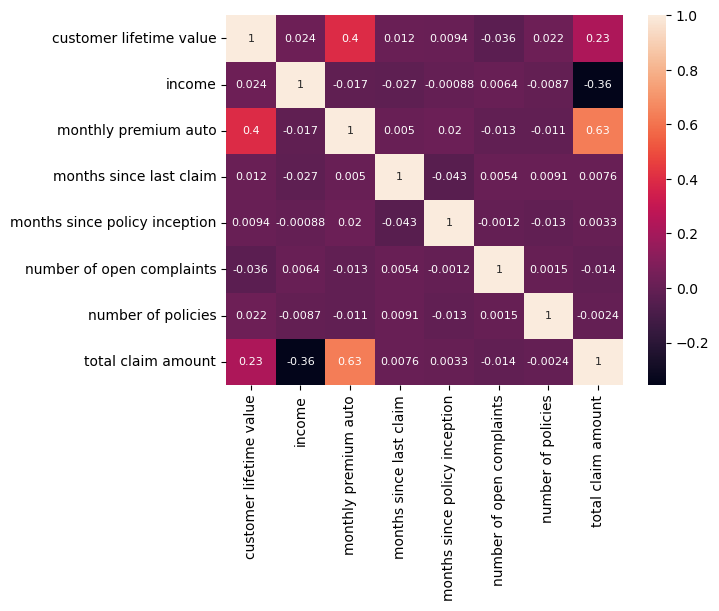

In [43]:
sns.heatmap(data.corr(),annot=True, annot_kws={"fontsize":8})
plt.show()

In [45]:
np.log(data['customer lifetime value'])

0        7.924260
1        8.850738
2        9.464008
3        8.941920
4        7.942253
          ...    
9129    10.060747
9130     8.038031
9131     9.007476
9132     8.925912
9133     7.867809
Name: customer lifetime value, Length: 9134, dtype: float64

In [46]:
data['customer lifetime value'] = np.log(data['customer lifetime value'])

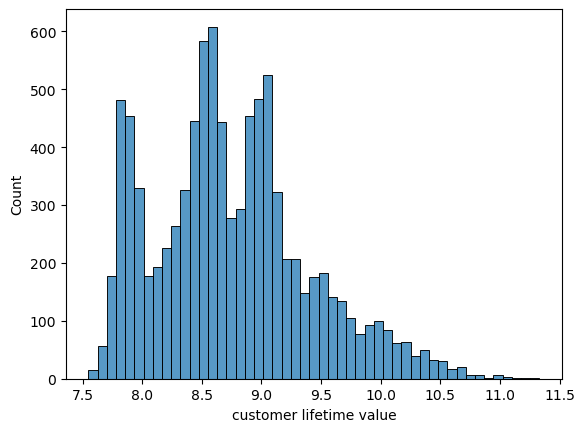

In [47]:
sns.histplot(data['customer lifetime value'])
plt.show()

In [48]:
stats.boxcox(data['customer lifetime value'])

(array([0.45858139, 0.45971703, 0.46028442, ..., 0.45987371, 0.45979326,
        0.45849822]),
 -2.1554665656514764)

In [49]:
arr, lmbda = stats.boxcox(data['customer lifetime value'])

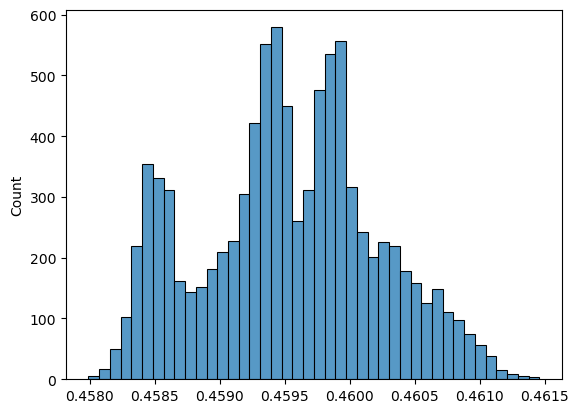

In [50]:
sns.histplot(arr)
plt.show()

In [51]:
np.log(data['income'])

C:\Users\Utilizador\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       10.937988
1            -inf
2       10.794809
3            -inf
4       10.688211
          ...    
9129    11.183602
9130     9.980634
9131         -inf
9132     9.996112
9133         -inf
Name: income, Length: 9134, dtype: float64

In [52]:
len(data[data['income'] < 0])

0

In [53]:
data['income_temp'] = np.where(data['income'] < 0, 0, data['income'])

In [54]:
data['income_temp'].replace(0, data['income_temp'].mean(), inplace=True)

In [55]:
arr, lmbda = stats.boxcox(data['income_temp'])

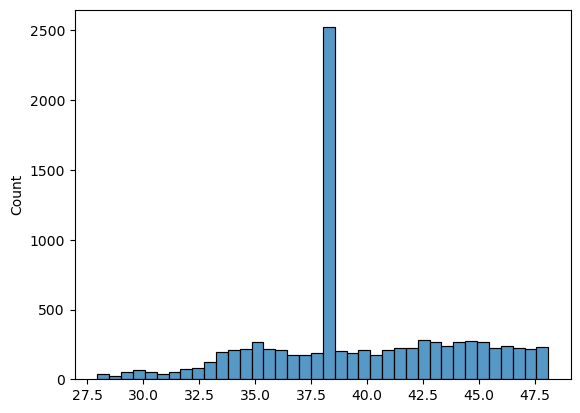

In [56]:
sns.histplot(arr)
plt.show()

In [57]:
stats.boxcox(data['monthly premium auto'])

(array([0.68534739, 0.6858706 , 0.68603902, ..., 0.68572538, 0.68589838,
        0.68556047]),
 -1.4560475713521648)

In [58]:
arr, lmbda = stats.boxcox(data['monthly premium auto'])

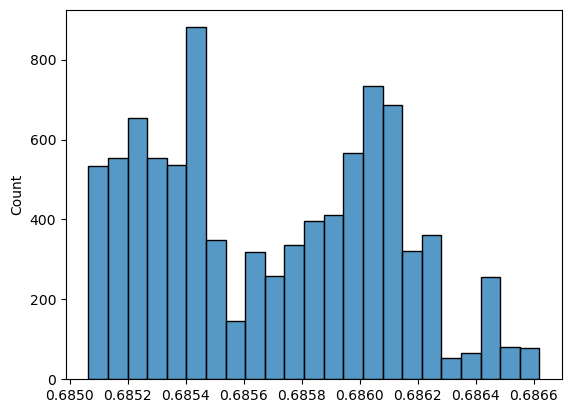

In [59]:
sns.histplot(arr)
plt.show()

In [60]:
len(data[data['monthly premium auto'] <= 0])

0

In [61]:
stats.boxcox(data['monthly premium auto'])

(array([0.68534739, 0.6858706 , 0.68603902, ..., 0.68572538, 0.68589838,
        0.68556047]),
 -1.4560475713521648)

In [62]:
arr, lmbda = stats.boxcox(data['monthly premium auto'])

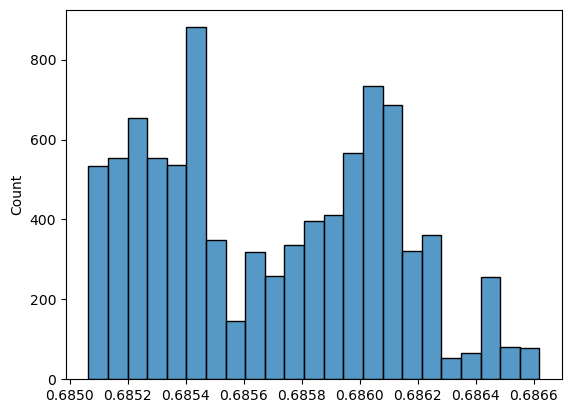

In [63]:
sns.histplot(arr)
plt.show()

In [64]:
def label_encoder(categorical):
    categorical_copy = categorical.copy()
    for i in categorical.columns:
        categorical_copy[i] = LabelEncoder().fit(categorical_copy[i]).transform(categorical_copy[i])
    return categorical_copy

In [66]:
categorical_copy = label_encoder(categorical)

In [67]:
categorical_copy

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,600,4,0,0,0,47,1,0,1,1,0,2,0,0,5,1
1,5946,0,0,1,0,24,4,0,1,2,1,5,2,0,0,1
2,96,2,0,2,0,41,1,0,1,1,1,5,0,0,5,1
3,8016,1,0,0,0,12,4,1,1,1,0,1,0,2,3,1
4,2488,4,0,0,0,52,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3857,1,0,0,0,32,1,1,2,1,1,3,1,3,0,1
9130,5390,1,1,1,1,34,1,0,1,0,0,2,0,1,0,1
9131,6688,1,0,1,0,55,4,1,1,2,0,1,0,1,0,1
9132,7214,1,0,1,1,52,1,1,1,1,1,4,2,1,0,0


In [68]:
Y = pd.read_csv('Y_data.csv')
Y = Y.drop(['Unnamed: 0'],axis=1)

In [69]:
numerical_x = pd.read_csv('numerical_data.csv').drop(['Total Claim Amount'],axis=1)

In [70]:
numerical_x.columns

Index(['Unnamed: 0', 'Customer Lifetime Value', 'Income',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [71]:
np.concatenate((numerical_x,categorical_copy), axis=1)

array([[0.00000000e+00, 2.76351928e+03, 5.62740000e+04, ...,
        0.00000000e+00, 5.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.97953590e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.28874317e+04, 4.87670000e+04, ...,
        0.00000000e+00, 5.00000000e+00, 1.00000000e+00],
       ...,
       [9.13100000e+03, 8.16389043e+03, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.13200000e+03, 7.52444244e+03, 2.19410000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.13300000e+03, 2.61183687e+03, 0.00000000e+00, ...,
        2.00000000e+00, 5.00000000e+00, 1.00000000e+00]])

In [72]:
pd.DataFrame(np.concatenate((numerical_x,categorical_copy), axis=1))

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,600.0,4.0,...,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,5.0,1.0
1,1.0,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,5946.0,0.0,...,4.0,0.0,1.0,2.0,1.0,5.0,2.0,0.0,0.0,1.0
2,2.0,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,96.0,2.0,...,1.0,0.0,1.0,1.0,1.0,5.0,0.0,0.0,5.0,1.0
3,3.0,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,8016.0,1.0,...,4.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,1.0
4,4.0,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,2488.0,4.0,...,1.0,1.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129.0,23405.987980,71941.0,73.0,18.0,89.0,0.0,2.0,3857.0,1.0,...,1.0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0
9130,9130.0,3096.511217,21604.0,79.0,14.0,28.0,0.0,1.0,5390.0,1.0,...,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
9131,9131.0,8163.890428,0.0,85.0,9.0,37.0,3.0,2.0,6688.0,1.0,...,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0
9132,9132.0,7524.442436,21941.0,96.0,34.0,3.0,0.0,3.0,7214.0,1.0,...,1.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,0.0,0.0


In [73]:
X = pd.DataFrame(np.concatenate((numerical_x,categorical_copy), axis=1))

In [74]:
train_test_split(X,Y,test_size=0.4,random_state=100)

[          0             1        2      3     4     5    6    7       8    9   \
 3715  3715.0   9015.915395      0.0  130.0  32.0  38.0  0.0  4.0  3693.0  0.0   
 3824  3824.0   9672.701942      0.0   96.0   5.0  27.0  0.0  2.0  2107.0  3.0   
 4708  4708.0   9061.767848  37970.0  115.0   8.0  44.0  0.0  3.0  8168.0  3.0   
 8734  8734.0  14980.046260      0.0  222.0  26.0  50.0  0.0  8.0  6710.0  1.0   
 6094  6094.0   8229.240991      0.0  109.0   5.0  63.0  0.0  3.0  2071.0  3.0   
 ...      ...           ...      ...    ...   ...   ...  ...  ...     ...  ...   
 350    350.0   7762.590564  23827.0  106.0  18.0  77.0  2.0  3.0  6139.0  1.0   
 79      79.0  58166.553510  61321.0  186.0   0.0  30.0  1.0  2.0  5077.0  1.0   
 8039  8039.0   5577.669457  11097.0   73.0  26.0  50.0  0.0  4.0  5816.0  4.0   
 6936  6936.0   4082.704584  23206.0  107.0  31.0  60.0  0.0  1.0  8788.0  3.0   
 5640  5640.0   4198.025250  30598.0  106.0  13.0  21.0  0.0  1.0  7706.0  0.0   
 
       ...   1

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=100)

In [76]:
model = sm.OLS(y_train,x_train).fit()

In [77]:
predictions = model.predict(x_test)

In [78]:
Lreg = LinearRegression().fit(x_train, y_train)

In [79]:
predictions = Lreg.predict(x_test)

In [80]:
r2 = r2_score(y_test, predictions)

In [81]:
mse = mean_squared_error(y_test,predictions)

In [82]:
rmse = math.sqrt(mse)

In [83]:
mae = mean_absolute_error(y_test, predictions)

In [86]:
r2

0.590258893894833

In [87]:
mse

32555.121519466884

In [88]:
rmse

180.43037859370267

In [89]:
mae

131.93937243565188